In [1]:
import numpy as np
import ast
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def preprocess_fn(meas):
    meas = ast.literal_eval(meas)
    meas['Step'] = meas['Step'] * 100000
    meas['AX'] = meas['AX'] * 10
    meas['AY'] = meas['AY'] * 10
    meas['AZ'] = meas['AZ'] * 10
    return meas

In [3]:
file = open("SPI_READ_CLASS_1.txt", 'r')

In [4]:
line = file.readline()
line = preprocess_fn(line)
measurements1 = pd.DataFrame().from_dict(line, orient='index').transpose()

In [5]:
while line:
    line = file.readline()
    if line:
        line = preprocess_fn(line)
        next_meas = pd.DataFrame().from_dict(line, orient='index').transpose()
        measurements1 = pd.concat([measurements1, next_meas], ignore_index=True)

In [6]:
measurements1

,Current,Step,AX,AY,AZ
0,123200,300000,156150,-1260,4950
1,123200,300000,156150,-1260,4950
2,123200,300000,156150,-1260,4950
3,123200,300000,156150,-1260,4950
4,123200,300000,156150,-1260,4950
...,...,...,...,...,...
183775,96800,300000,167060,8800,-5460
183776,96800,300000,167060,8800,-5460
183777,96800,300000,167060,8800,-5460
183778,96800,300000,167060,8800,-5460


In [7]:
file.close()

(-150000.0, 150000.0)

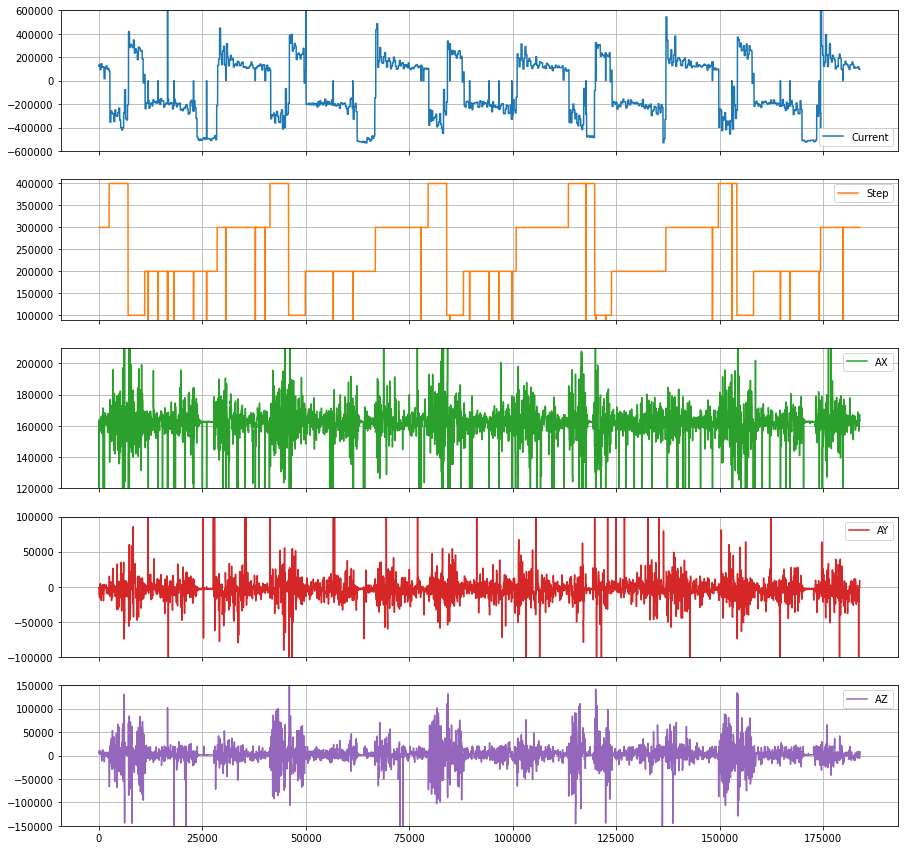

In [8]:
ax = measurements1.plot(subplots=True, figsize=(15,15), grid=True)
ax[0].set_ylim(-6e5,6e5)
ax[1].set_ylim(90000,410000)
ax[2].set_ylim(120000, 210000)
ax[3].set_ylim(-100000, 100000)
ax[4].set_ylim(-150000, 150000)

In [9]:
fig = ax[0].get_figure()

In [10]:
fig.savefig('class1.png', bbox_inches='tight')

In [11]:
file = open("SPI_READ2_CLASS_0.txt", 'r')

In [12]:
line = file.readline()
line = preprocess_fn(line)
measurements0 = pd.DataFrame().from_dict(line, orient='index').transpose()

In [13]:
while line:
    line = file.readline()
    if line:
        line = preprocess_fn(line)
        next_meas = pd.DataFrame().from_dict(line, orient='index').transpose()
        measurements0 = pd.concat([measurements0, next_meas], ignore_index=True)

In [14]:
measurements0

,Current,Step,AX,AY,AZ
0,-181500,200000,158400,-5000,15440
1,-181500,200000,158400,-5000,15440
2,-181500,200000,158400,-5000,15440
3,-181500,200000,158400,-5000,15440
4,-181500,200000,158400,-5000,15440
...,...,...,...,...,...
182692,-170500,200000,162380,6060,1300
182693,-170500,200000,162380,6060,1300
182694,-170500,200000,162380,6060,1300
182695,-170500,200000,162380,6060,1300


In [15]:
file.close()

(-150000.0, 150000.0)

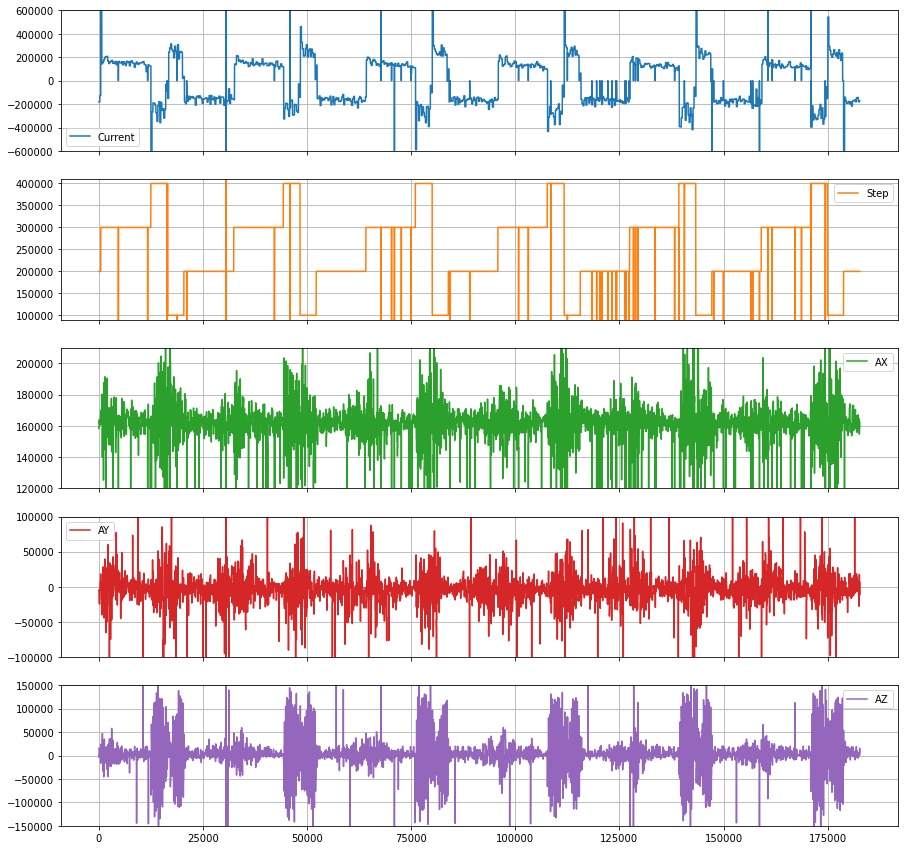

In [16]:
ax = measurements0.plot(subplots=True, figsize=(15,15), grid=True)
ax[0].set_ylim(-6e5,6e5)
ax[1].set_ylim(90000,410000)
ax[2].set_ylim(120000, 210000)
ax[3].set_ylim(-100000, 100000)
ax[4].set_ylim(-150000, 150000)

In [17]:
fig = ax[0].get_figure()

In [18]:
fig.savefig('class0_2.png', bbox_inches='tight')

In [19]:
measurements1.describe()

,Current,Step,AX,AY,AZ
count,1.837800e+05,183780.000000,183780.000000,183780.000000,183780.000000
mean,-7.298992e+04,249682.772881,162599.008216,-3505.670584,2051.424910
std,2.559035e+05,85775.157487,12407.802096,15893.640923,24562.120862
min,-5.313000e+05,0.000000,-322830.000000,-293440.000000,-309490.000000
25%,-2.376000e+05,200000.000000,158260.000000,-10350.000000,-5700.000000
50%,-1.749000e+05,200000.000000,162640.000000,-3260.000000,1460.000000
75%,1.320000e+05,300000.000000,166940.000000,3640.000000,8820.000000
max,3.335203e+07,400000.000000,324830.000000,327540.000000,189020.000000


In [20]:
measurements0.describe()

,Current,Step,AX,AY,AZ
count,1.826970e+05,1.826970e+05,182697.000000,182697.000000,182697.000000
mean,-1.296386e+04,2.535789e+05,162217.417418,-3472.795503,2378.195865
std,5.011661e+06,1.484334e+05,14697.618568,21548.469969,39756.610416
min,-1.073642e+09,0.000000e+00,-163820.000000,-324400.000000,-309620.000000
25%,-1.716000e+05,2.000000e+05,157400.000000,-13150.000000,-6140.000000
50%,9.570000e+04,3.000000e+05,162260.000000,-3350.000000,2040.000000
75%,1.474000e+05,3.000000e+05,167580.000000,5980.000000,11680.000000
max,1.024324e+09,2.550000e+07,317160.000000,327340.000000,326550.000000


In [24]:
measurements1[measurements1.Step == 100000].describe()

,Current,Step,AX,AY,AZ
count,20148.000000,20148.0,20148.000000,20148.000000,20148.000000
mean,225184.254914,100000.0,162096.281517,-4133.530872,4867.458805
std,118248.676888,0.0,19479.490410,24830.607722,44455.347577
min,-251900.000000,100000.0,200.000000,-158880.000000,-144570.000000
25%,213400.000000,100000.0,151540.000000,-15560.000000,-19400.000000
50%,253000.000000,100000.0,161960.000000,-2670.000000,3940.000000
75%,289300.000000,100000.0,169970.000000,7120.000000,28460.000000
max,419100.000000,100000.0,258010.000000,313130.000000,189020.000000


In [25]:
measurements1[measurements1.Step == 200000].describe()

,Current,Step,AX,AY,AZ
count,7.646000e+04,76460.0,76460.000000,76460.000000,76460.000000
mean,-2.575600e+05,200000.0,162745.176301,-3115.456579,1662.010201
std,1.706214e+05,0.0,7398.099353,11239.223163,10006.140925
min,-5.313000e+05,200000.0,-322830.000000,-148680.000000,-309490.000000
25%,-2.596000e+05,200000.0,159480.000000,-8340.000000,-3160.000000
50%,-2.112000e+05,200000.0,162660.000000,-3200.000000,1350.000000
75%,-1.914000e+05,200000.0,165840.000000,2120.000000,6560.000000
max,3.335203e+07,200000.0,201900.000000,327540.000000,65400.000000


In [26]:
measurements1[measurements1.Step == 300000].describe()

,Current,Step,AX,AY,AZ
count,62753.000000,62753.0,62753.000000,62753.000000,62753.000000
mean,147342.325626,300000.0,162703.286058,-3954.151196,1692.874126
std,78923.910222,0.0,9820.905989,15724.206869,15327.086238
min,-402876.000000,300000.0,-81900.000000,-293440.000000,-309130.000000
25%,111100.000000,300000.0,158740.000000,-11240.000000,-5060.000000
50%,129800.000000,300000.0,162620.000000,-3540.000000,1630.000000
75%,165000.000000,300000.0,166620.000000,3560.000000,7300.000000
max,645700.000000,300000.0,324830.000000,325330.000000,76220.000000


In [27]:
measurements1[measurements1.Step == 400000].describe()

,Current,Step,AX,AY,AZ
count,24385.000000,24385.0,24385.000000,24385.000000,24385.000000
mean,-307911.937995,400000.0,162514.011072,-3060.043469,1870.433463
std,116338.227709,0.0,19746.852636,18987.387407,44543.918336
min,-486200.000000,400000.0,-149710.000000,-90150.000000,-145580.000000
25%,-380600.000000,400000.0,151720.000000,-11460.000000,-25000.000000
50%,-322300.000000,400000.0,162440.000000,-3340.000000,1890.000000
75%,-271700.000000,400000.0,172650.000000,7200.000000,26300.000000
max,104500.000000,400000.0,240410.000000,154390.000000,130540.000000


In [32]:
measurements0[measurements0.Step == 100000].describe()

,Current,Step,AX,AY,AZ
count,2.316900e+04,23169.0,23169.000000,23169.000000,23169.000000
mean,2.050913e+05,100000.0,162636.286417,-2388.168674,3008.822996
std,7.057752e+06,0.0,22466.329601,29541.050628,67918.429114
min,-1.073642e+09,100000.0,-27570.000000,-320060.000000,-155650.000000
25%,2.101000e+05,100000.0,149290.000000,-16840.000000,-58540.000000
50%,2.365000e+05,100000.0,165120.000000,-2380.000000,13220.000000
75%,2.706000e+05,100000.0,175320.000000,12290.000000,49800.000000
max,1.370600e+06,100000.0,243870.000000,109660.000000,156500.000000


In [33]:
measurements0[measurements0.Step == 200000].describe()

,Current,Step,AX,AY,AZ
count,6.378700e+04,63787.0,63787.000000,63787.000000,63787.000000
mean,-1.670699e+05,200000.0,162331.631837,-3779.525452,2160.357753
std,6.591577e+04,0.0,6929.119920,16228.707109,11403.565363
min,-1.017500e+06,200000.0,-160840.000000,-324400.000000,-309490.000000
25%,-1.815000e+05,200000.0,158570.000000,-11500.000000,-4060.000000
50%,-1.650000e+05,200000.0,162090.000000,-3560.000000,2120.000000
75%,-1.496000e+05,200000.0,166130.000000,4500.000000,8460.000000
max,1.331000e+05,200000.0,188980.000000,327340.000000,326550.000000


In [34]:
measurements0[measurements0.Step == 300000].describe()

,Current,Step,AX,AY,AZ
count,71295.000000,71295.0,71295.000000,71295.000000,71295.000000
mean,140636.068560,300000.0,162286.227085,-2949.217897,2079.211165
std,58936.246733,0.0,9020.452932,19039.165391,15458.207396
min,-193600.000000,300000.0,-38950.000000,-319720.000000,-309620.000000
25%,123200.000000,300000.0,158360.000000,-11780.000000,-3740.000000
50%,138600.000000,300000.0,162310.000000,-3220.000000,1670.000000
75%,155100.000000,300000.0,166460.000000,5260.000000,8390.000000
max,902000.000000,300000.0,312110.000000,325520.000000,308110.000000


In [35]:
measurements0[measurements0.Step == 400000].describe()


,Current,Step,AX,AY,AZ
count,2.435500e+04,24355.0,24355.000000,24355.000000,24355.000000
mean,-2.499430e+05,400000.0,161928.225416,-5244.659823,3250.416752
std,8.710499e+05,0.0,25948.778624,29895.389794,80093.906920
min,-1.239700e+06,400000.0,-112100.000000,-323600.000000,-174090.000000
25%,-3.135000e+05,400000.0,147900.000000,-22470.000000,-66460.000000
50%,-2.453000e+05,400000.0,161290.000000,-5280.000000,2000.000000
75%,-2.024000e+05,400000.0,177250.000000,13240.000000,71560.000000
max,1.338217e+08,400000.0,317160.000000,163080.000000,212800.000000
